In [1]:
import numpy as np
import fluidfoam
import matplotlib.pyplot as plt
import os
import re

%pip install numpy==1.24.0

In [2]:
# Check If a String Can Be Converted To Float Using Regular Expressions.
def is_float_regex(value):
    return bool(re.match(r'^[-+]?[0-9]*\.?[0-9]+$', value))

# Check If a String Can Be Converted To Float and the value is not equal to zero.
def is_float_and_not_zero(value):
    return is_float_regex(value) and np.float64(value)!=0

# We do not take the time t=0, because the initial condition is not periodic, however the boundary conditions are taken periodic. At the next time instant the solution will become smoothened and periodic due to diffusion.

In [3]:
# We need to figure out how many nonzero time instants there are in the particular folder, because we want to exclude t=0.
path_to_case_1 = './workdir.1'
time_instants_considered = [i for i in os.listdir(path_to_case_1) if is_float_and_not_zero(i)]
# number_of_time_instants = sum(map(is_float_and_not_zero, os.listdir(path_to_case_1)))
number_of_time_instants = len(time_instants_considered)
print('number_of_time_instants =', number_of_time_instants)

number_of_time_instants = 50


In [4]:
# We want to know the shape of the solution field.
field = fluidfoam.readfield(path_to_case_1, time_name='0', name='T', structured=True, precision=6)
field = np.reshape(field, (np.shape(field)[0], np.shape(field)[1]))
print('np.shape(field) =', np.shape(field))

Reading file ./workdir.1/0/T
Reading file ./workdir.1/constant/polyMesh/owner
Reading file ./workdir.1/constant/polyMesh/faces
Reading file ./workdir.1/constant/polyMesh/points
Reading file ./workdir.1/constant/polyMesh/neighbour
np.shape(field) = (64, 64)


In [5]:
# Reading the mesh
X, Y, Z = fluidfoam.readof.readmesh(path_to_case_1, time_name='0', structured=True)
np.shape(X)

# We reshape arrays so that the shape is not (N, M, 1), but just (N, M).
X = np.reshape(X, (np.shape(X)[0], np.shape(X)[1]))
Y = np.reshape(Y, (np.shape(Y)[0], np.shape(Y)[1]))

Reading file ./workdir.1/constant/polyMesh/owner
Reading file ./workdir.1/constant/polyMesh/faces
Reading file ./workdir.1/constant/polyMesh/points
Reading file ./workdir.1/constant/polyMesh/neighbour


In [6]:
number_of_various_initial_conditions = 2

# Initialize big array, that will contain all solutions at all time instants.
all_T_solutions = np.zeros((number_of_various_initial_conditions, number_of_time_instants, *np.shape(field)))
print('np.shape(all_T_solutions) =', np.shape(all_T_solutions))

np.shape(all_T_solutions) = (2, 50, 64, 64)


In [9]:
for i in range(number_of_various_initial_conditions):
  path_to_case = './workdir.' + str(i+1)
    
  for t in range(number_of_time_instants):
    time = time_instants_considered[t]
    field = fluidfoam.readfield(path_to_case, time_name=time, name='T', structured=True, precision=6, verbose=False)
    
    # We reshape array so that the shape is not (N, M, 1), but just (N, M).
    field = np.reshape(field, (np.shape(field)[0], np.shape(field)[1]))

    all_T_solutions[i, t, :, :] = field

In [16]:
np.shape(all_T_solutions)

(2, 50, 64, 64)

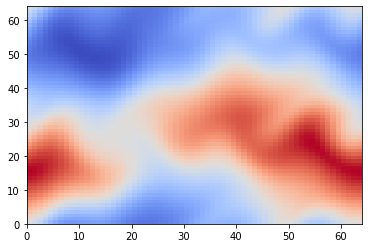

In [17]:
plt.pcolormesh(all_T_solutions[1, 13, :, :].T, cmap='coolwarm')
plt.show()

In [18]:
# data_file_name = 'advection-diffusion-data.npy'
# np.save(data_file_name, all_T_solutions)

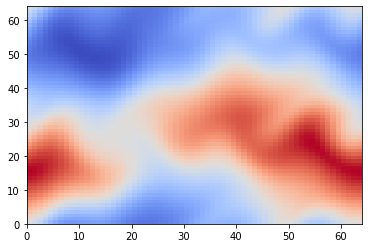

In [20]:
# temp = np.load(data_file_name)
# plt.pcolormesh(temp[1, 13, :, :].T, cmap='coolwarm')
# plt.show()

In [222]:
# a = np.stack([field, field2])
# b = np.append(a, [field3], axis=0)
# np.shape(b)

In [15]:
path_to_case = './workdir.992'

time = '0.2'

field = fluidfoam.readfield(path_to_case, time_name=time, name='T', structured=True, precision=6)
np.shape(field)
X, Y, Z = fluidfoam.readof.readmesh(path_to_case, time_name='0', structured=True)

# We reshape arrays so that the shape is not (N, M, 1), but just (N, M).
X = np.reshape(X, (np.shape(X)[0], np.shape(X)[1]))
Y = np.reshape(Y, (np.shape(Y)[0], np.shape(Y)[1]))
field = np.reshape(field, (np.shape(field)[0], np.shape(field)[1]))
# field_min, field_max = np.abs(field).min(), np.abs(field).max()

Reading file ./workdir.992/0.2/T
Reading file ./workdir.992/constant/polyMesh/owner
Reading file ./workdir.992/constant/polyMesh/faces
Reading file ./workdir.992/constant/polyMesh/points
Reading file ./workdir.992/constant/polyMesh/neighbour
Reading file ./workdir.992/constant/polyMesh/owner
Reading file ./workdir.992/constant/polyMesh/faces
Reading file ./workdir.992/constant/polyMesh/points
Reading file ./workdir.992/constant/polyMesh/neighbour


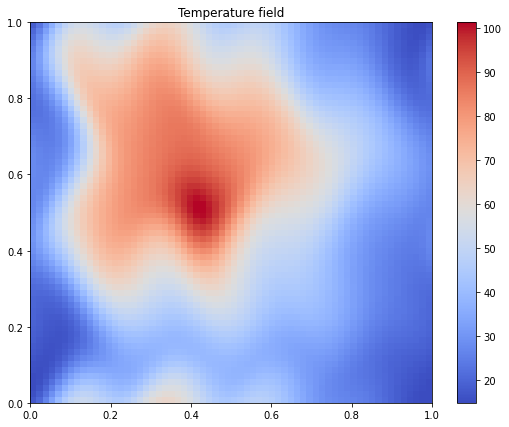

In [13]:
fig, ax = plt.subplots(figsize=(9, 7))

c = ax.pcolormesh(X, Y, field, cmap='coolwarm')#, vmin=field_min, vmax=field_max)
ax.set_title('Temperature field')

# set the limits of the plot to the limits of the data
# ax.axis([X.min(), X.max(), Y.min(), Y.max()])
fig.colorbar(c, ax=ax)

plt.show()

U = 1.
D = 0.05
C_2 = 1 / (np.exp(U / D) - 1)
C_1 = - U * C_2

def T_analyt(x):
  return C_1 / U + C_2 * np.exp(U * x / D)

plt.plot(X[:, 0], field[:, 5], label='numerical')
plt.plot(X[:, 0], T_analyt(X[:, 0]), label='analyt')

plt.grid(True)
plt.legend()
plt.show()

plt.plot(X[:, 0], T_analyt(X) - field[:, 5])

plt.grid(True)
plt.show()